In [101]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

# Basic modules for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#blog on instacart data analysis
#https://docs.google.com/document/d/1HDjpYei59M18kSTZQzXmCCoW8qraeCISJtQv1166-DM/edit#

# Load data into a pandas DataFrame from given filepath
datafile = './instacart_shopper_and Door-dash data - instacart order data.csv'

shopping = pd.read_csv(datafile, parse_dates=[0])
shopping.columns

Index([u'date', u'store_name', u'store_address', u'order_type',
       u'batch_accept_time', u'store_reach_time', u'instacart_pay_amount',
       u'tip_amount', u'num_orders', u'drive_distance', u'num_items',
       u'shopping_speed', u'checkout_speed', u'dropoff_time_A',
       u'dropoff_time_B', u'dropoff_time_C', u'heavy_pay', u'peak_boost',
       u'comments'],
      dtype='object')

In [102]:
shopping['date'].dtype
shopping.head()

,date,store_name,store_address,order_type,batch_accept_time,store_reach_time,instacart_pay_amount,tip_amount,num_orders,drive_distance,num_items,shopping_speed,checkout_speed,dropoff_time_A,dropoff_time_B,dropoff_time_C,heavy_pay,peak_boost,comments
0,2020-06-22,Food Bazaar,NaN,full service,8:38 AM,8:58 AM,19.12,6.28,1,1.2,19/26,NaN,NaN,10:50 AM,NaN,NaN,NaN,NaN,NaN
1,2020-06-22,Aldi,61-11 Junction Blvd,full service,11:09 AM,11:46 AM,19.50,0.00,1,5.7,14/28,NaN,NaN,1:00 PM,NaN,NaN,NaN,2.0,NaN
2,2020-06-23,Aldi,61-11 Junction Blvd,full service,9:00 AM,9:18 AM,19.76,3.82,1,10.2,12/38,NaN,NaN,10:56 AM,NaN,NaN,NaN,NaN,NaN
3,2020-06-23,Food Universe,75-55 31st ave,full service,11:53 AM,12:14 PM,24.35,5.92,1,0.9,29/30,NaN,NaN,2:27 PM,NaN,NaN,NaN,NaN,NaN
4,2020-06-24,Costco,NaN,full service,9:55 AM,10:22 AM,11.11,3.06,1,1.0,6/6,NaN,NaN,11:51 AM,NaN,NaN,NaN,NaN,NaN


In [103]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 19 columns):
date                    212 non-null datetime64[ns]
store_name              212 non-null object
store_address           118 non-null object
order_type              212 non-null object
batch_accept_time       212 non-null object
store_reach_time        212 non-null object
instacart_pay_amount    212 non-null float64
tip_amount              212 non-null float64
num_orders              212 non-null int64
drive_distance          212 non-null float64
num_items               212 non-null object
shopping_speed          117 non-null object
checkout_speed          117 non-null object
dropoff_time_A          212 non-null object
dropoff_time_B          91 non-null object
dropoff_time_C          8 non-null object
heavy_pay               22 non-null object
peak_boost              92 non-null float64
comments                82 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), objec

## Numerical attributes

In [104]:
shopping.select_dtypes(exclude=['object']).columns

Index([u'date', u'instacart_pay_amount', u'tip_amount', u'num_orders',
       u'drive_distance', u'peak_boost'],
      dtype='object')

## Explore Numerical Attributes

In [150]:
# Descriptive statistics summary
shopping['instacart_pay_amount'].describe()

count    212.000000
mean      21.671651
std        9.258456
min        5.970000
25%       15.385000
50%       19.760000
75%       27.270000
max       64.600000
Name: instacart_pay_amount, dtype: float64

In [105]:
shopping['total_pay'] = shopping.apply(lambda row: row.instacart_pay_amount + row.tip_amount, axis=1)
#sns.distplot(shopping['total_pay'])

In [108]:
def plot_moving_avg(sma_data, ema_data, cma_data, column_title, xlabel, ylabel):
    plt.figure(figsize=[15,8])
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.plot(shopping['instacart_pay_amount'],label='instacart_pay')
    plt.plot(sma_data,label=column_title+'_SMA')
    #plt.plot(ema_data,label=column_title+ '_EMA')
    plt.plot(cma_data,label=column_title+'_CMA')
    plt.legend(loc=2)

## Moving averages of instacart_pay_amount

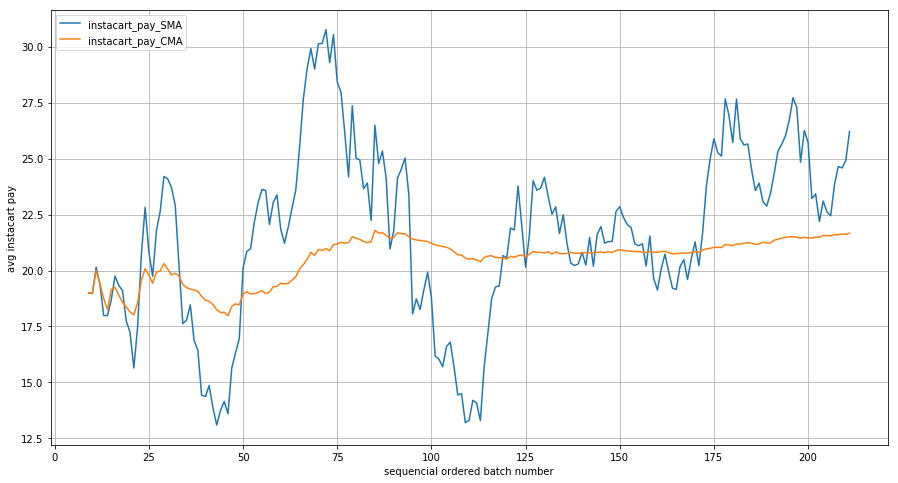

In [109]:
shopping['SMA_10'] = shopping['instacart_pay_amount'].rolling(window=10).mean() #simple moving avg with window size 10.
#instacart_pay_amount is on column index 5
shopping['CMA_10'] = shopping['instacart_pay_amount'].expanding(min_periods=10).mean() #cumulative moving average
shopping['EMA'] = shopping['instacart_pay_amount'].ewm(alpha=0.2,adjust=False).mean()
plot_moving_avg(shopping['SMA_10'], shopping['EMA'], shopping['CMA_10'], 'instacart_pay', 'sequencial ordered batch number', 'avg instacart pay')


 per order instacart_earning measurement via Simple moving avg (SMA), Cumulative moving avg(CMA), Exponential Moving avg(EMA).
 
 From the plot we see that, SMA fluctuates less after 130 batches. CMA is less susceptible to new datapoint after 120 batches. EMA follows the trend of SMA. With lower alpha value, EMA plot resembles SMA.

## Moving averages of tip per batch

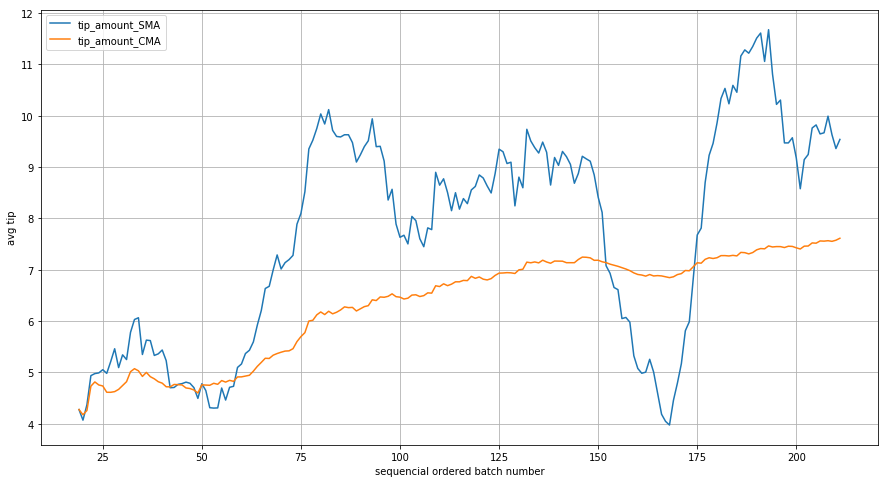

In [110]:
shopping['SMA_10'] = shopping['tip_amount'].rolling(window=20).mean() #simple moving avg with window size 10.
#instacart_pay_amount is on column index 5
shopping['CMA_10'] = shopping['tip_amount'].expanding(min_periods=20).mean() #cumulative moving average
shopping['EMA'] = shopping['tip_amount'].ewm(alpha=0.4,adjust=False).mean()
plot_moving_avg(shopping['SMA_10'], shopping['EMA'], shopping['CMA_10'], 'tip_amount', 'sequencial ordered batch number', 'avg tip')


## Moving averages of total_pay per batch

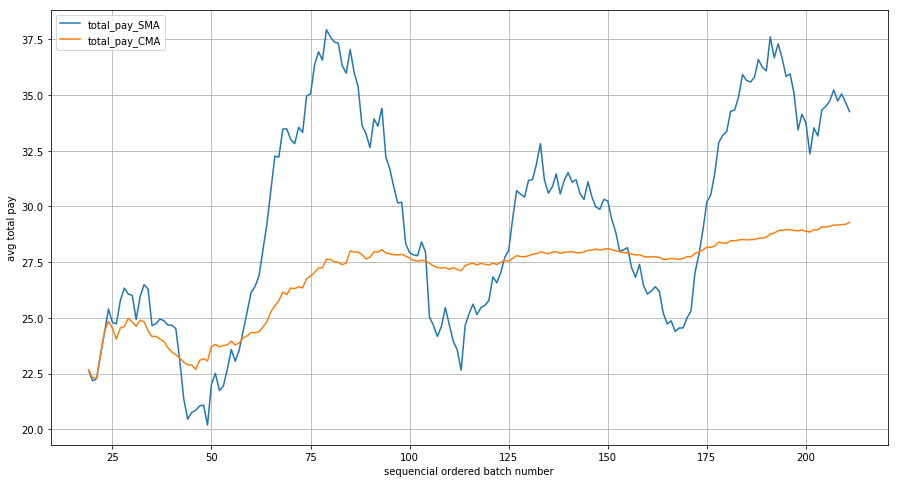

In [111]:
shopping['SMA_20'] = shopping['total_pay'].rolling(window=20).mean() #simple moving avg with window size 10.
#instacart_pay_amount is on column index 5
shopping['CMA_20'] = shopping['total_pay'].expanding(min_periods=20).mean() #cumulative moving average
shopping['EMA'] = shopping['total_pay'].ewm(alpha=0.4,adjust=False).mean()
plot_moving_avg(shopping['SMA_20'], shopping['EMA'], shopping['CMA_20'], 'total_pay', 'sequencial ordered batch number', 'avg total pay')


## Moving avg of num_orders per batch

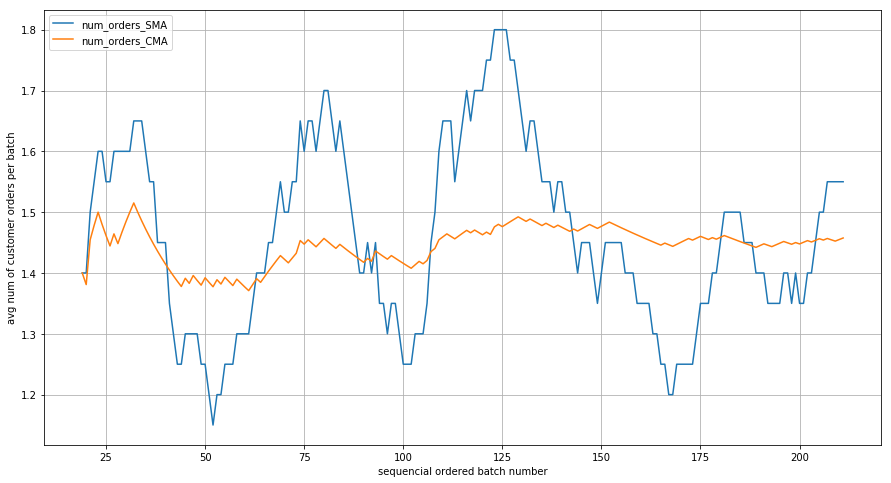

In [112]:
shopping['SMA_20'] = shopping['num_orders'].rolling(window=20).mean() #simple moving avg with window size 10.
#instacart_pay_amount is on column index 5
shopping['CMA_20'] = shopping['num_orders'].expanding(min_periods=20).mean() #cumulative moving average
shopping['EMA'] = shopping['num_orders'].ewm(alpha=0.4,adjust=False).mean()
plot_moving_avg(shopping['SMA_20'], shopping['EMA'], shopping['CMA_20'], 'num_orders', 'sequencial ordered batch number', 'avg num of customer orders per batch')


In [13]:
shopping['instacart_pay_amount'].describe()
#sns.distplot(shopping['instacart_pay_amount'])

count    212.000000
mean      21.671651
std        9.258456
min        5.970000
25%       15.385000
50%       19.760000
75%       27.270000
max       64.600000
Name: instacart_pay_amount, dtype: float64

In [88]:
shopping['tip_amount'].describe()
#sns.distplot(shopping['tip_amount'])

count    212.000000
mean       7.614245
std        5.119495
min        0.000000
25%        3.700000
50%        6.695000
75%       10.160000
max       25.440000
Name: tip_amount, dtype: float64

## Stacked Plot of instacart_pay with tip as percentage

<Figure size 4500x3000 with 0 Axes>

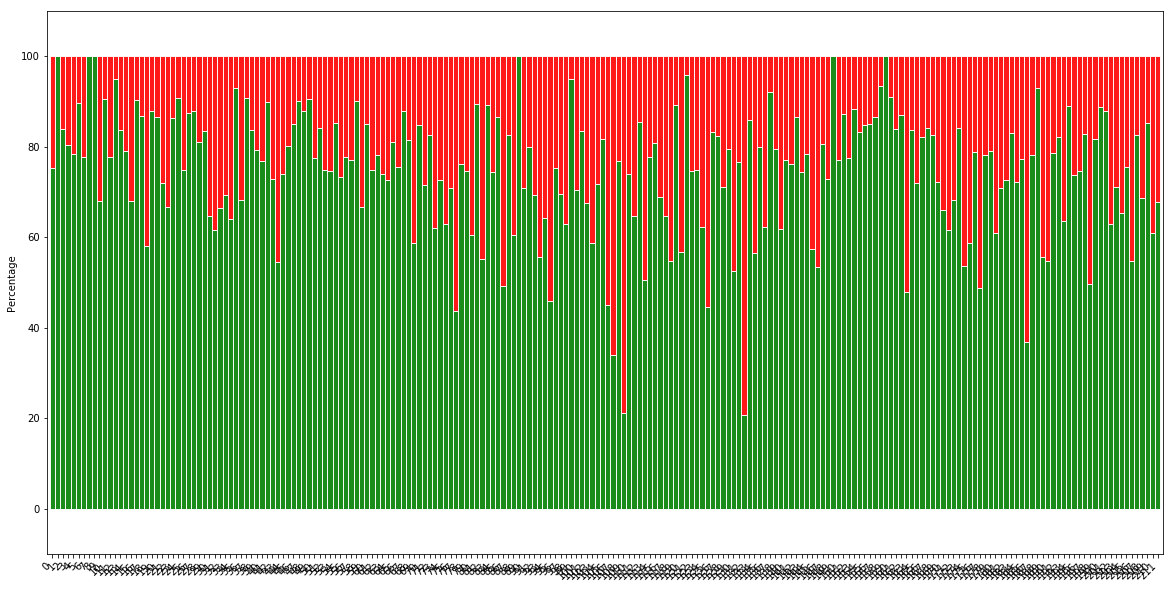

In [113]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 20), dpi=150, facecolor='w', edgecolor='k')

# Heights of bars1 + bars2
bars = np.add(shopping['instacart_pay_amount'], shopping['tip_amount']).tolist()
 
# The position of the bars on the x-axis
r = [i for i in range(1, shopping.shape[0]+1)]
 
# Names of group and bar width
names = range(1, shopping.shape[0]+1)
barWidth = 0.8
 
# Create brown bars
#plt.bar(r, shopping['instacart_pay_amount'], color='green', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
#plt.bar(r, shopping['tip_amount'], bottom=shopping['instacart_pay_amount'], color='red', edgecolor='white', width=barWidth)
 
# Custom X axis
#plt.xticks(r, names)
#plt.xlabel("customer order")
 
# Show graphic
#plt.show()


##stack plot as percentage

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(shopping['instacart_pay_amount']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(shopping['instacart_pay_amount'], shopping['tip_amount'])]

# Create the percentage of the total score the pre_score value for each participant was
instacart_percent = [i / j * 100 for  i,j in zip(shopping['instacart_pay_amount'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
tip_percent = [i / j * 100 for  i,j in zip(shopping['tip_amount'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       instacart_percent, 
       # labeled 
       label='instacart_percentage', 
       # with alpha
       alpha=0.9, 
       # with color
       color='green',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       tip_percent, 
       # with pre_rel
       bottom=instacart_percent, 
       # labeled 
       label='Instacart_percentage', 
       # with alpha
       alpha=0.9, 
       # with color
       color='red', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, bar_l)
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

## analysis on stores where I shopped

In [14]:
shopping.groupby(['store_name']).groups.keys()

['Ideal Food Basket',
 'Food Bazaar',
 'Food Universe',
 'Aldi',
 'Bed Bath & Beyond',
 'Jetro',
 'Stop & Shop',
 "BJ's Wholesale Club",
 'CVS Pharmacy',
 'SuperFresh',
 'Costco',
 'ShopRite',
 'Brooklyn Harvest',
 'Target',
 'GW Supermarket',
 'Restaurant Depot',
 'Rite Aid Pharmacy',
 'Key Food Marketplace',
 'Key Food Urban Marketplace',
 'Wegmans',
 'Key Food',
 'Foodtown']

In [15]:
#number of times shopped at each store
shopping.groupby('store_name')['date'].count().sort_values(ascending=False)

store_name
Costco                        68
Aldi                          51
BJ's Wholesale Club           38
Food Universe                 13
Food Bazaar                    7
Wegmans                        7
Restaurant Depot               5
GW Supermarket                 4
Key Food Marketplace           3
Stop & Shop                    3
Target                         2
Key Food Urban Marketplace     1
Key Food                       1
Jetro                          1
Foodtown                       1
Rite Aid Pharmacy              1
ShopRite                       1
CVS Pharmacy                   1
Brooklyn Harvest               1
Bed Bath & Beyond              1
SuperFresh                     1
Ideal Food Basket              1
Name: date, dtype: int64

In [16]:
#group by both store and order type (full service or delivery only)
shopping.groupby(['store_name', 'order_type'])['date'].count()#.sort_values(ascending=False)

store_name                  order_type   
Aldi                        delivery only     4
                            full service     47
BJ's Wholesale Club         full service     38
Bed Bath & Beyond           full service      1
Brooklyn Harvest            full service      1
CVS Pharmacy                full service      1
Costco                      full service     68
Food Bazaar                 full service      7
Food Universe               delivery only     7
                            full service      6
Foodtown                    full service      1
GW Supermarket              full service      4
Ideal Food Basket           full service      1
Jetro                       full service      1
Key Food                    full service      1
Key Food Marketplace        full service      3
Key Food Urban Marketplace  full service      1
Restaurant Depot            full service      5
Rite Aid Pharmacy           full service      1
ShopRite                    full service      

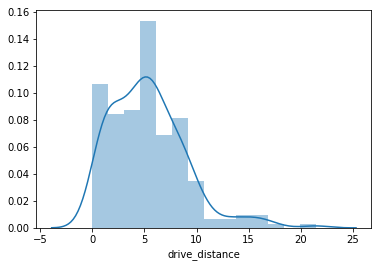

In [19]:
sns.distplot(shopping['drive_distance'])

## Looking for Outliers

Index([u'date', u'instacart_pay_amount', u'tip_amount', u'num_orders',
       u'drive_distance', u'peak_boost', u'total_pay', u'SMA_10', u'CMA_10',
       u'EMA', u'SMA_20', u'CMA_20'],
      dtype='object')


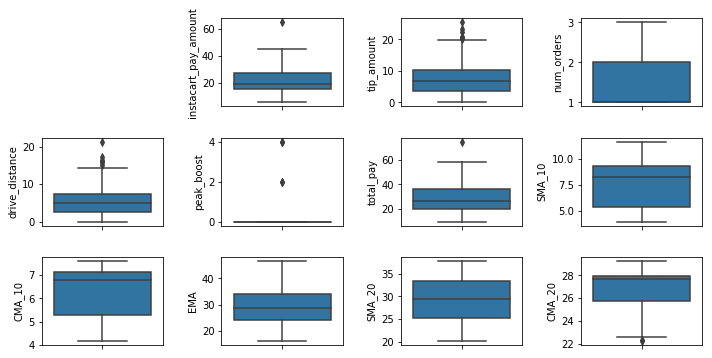

In [17]:
num_attributes = shopping.select_dtypes(exclude='object').copy()
fig = plt.figure(figsize=(10, 15))
print num_attributes.columns

for i in range(len(num_attributes.columns)):
    if num_attributes.columns[i] == 'date':
        continue
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

From the box plots of instacart_pay_amount and total_pay, customer's tip has made the median total_pay pass over 20$.

## predict instacart payment of a batch using linear regression based on multiple features such as order_type, store, num_orders, num_items etc

Mean squared error: 15.54
Coefficient of determination: 0.86


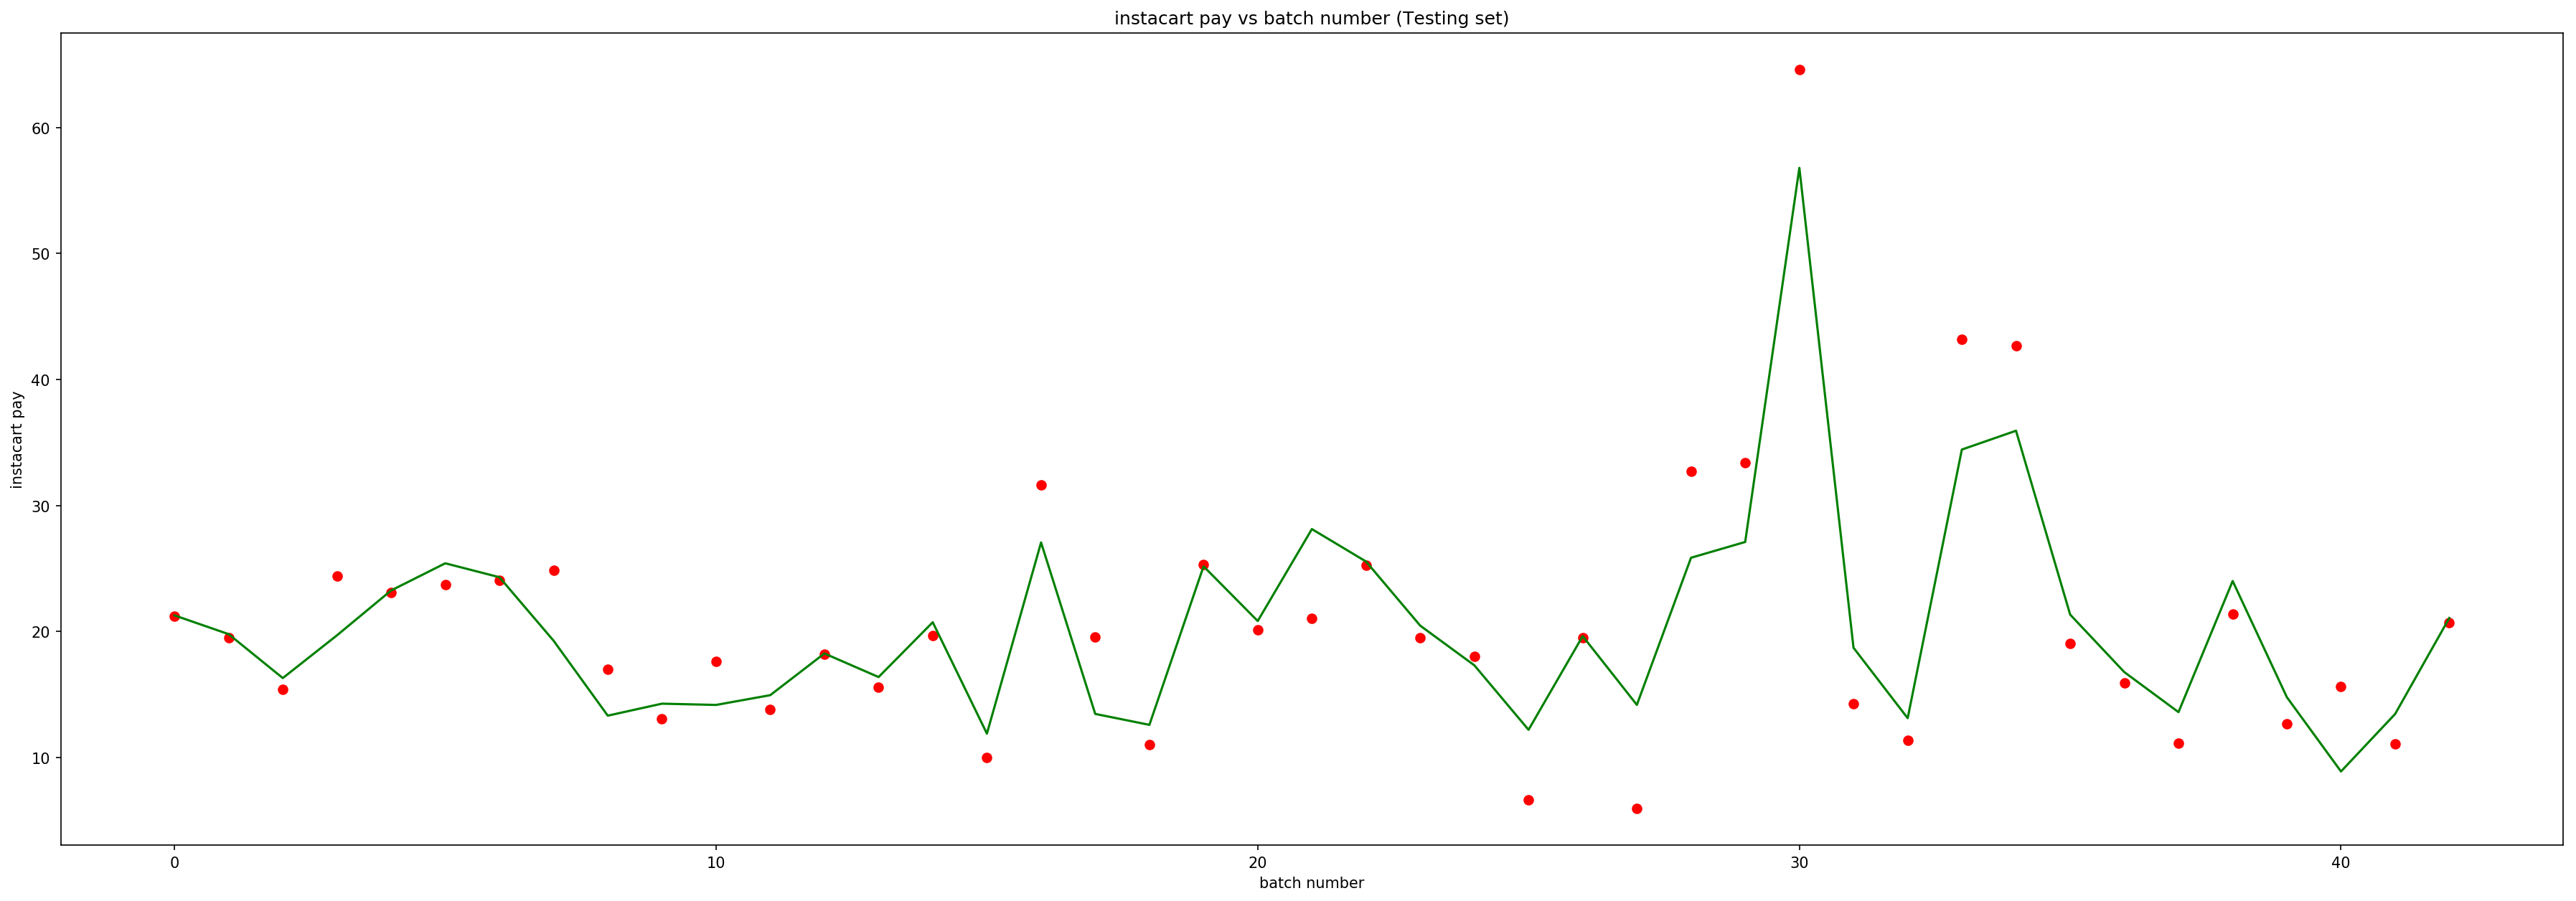

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def item_function(item_col):
    #print type(item_col)
    item_col = str(item_col)
    if "bag" in item_col:
        return int(item_col[0:item_col.index('bag')-1])
    else:
        return int(item_col.split('/')[0])

def heavy_pay_func(cell):
    #print type(cell)
    if not cell:
        return 0
    cell = str(cell)
    if len(cell) <= 1:
        return 0
    if 'yes' in cell:
        return 1
    return 0

def item_function2(item_col):
    #print type(item_col)
    item_col = str(item_col)
    if "bag" in item_col:
        return int(item_col[0:item_col.index('bag')-1])
    else:
        return int(item_col.split('/')[1])
        
shopping = pd.read_csv(datafile,  parse_dates=[0])

plt.figure(num=None, figsize=(30, 10), dpi=150, facecolor='w', edgecolor='k')

shopping['num_items_tmp'] = shopping['num_items'].apply(item_function)
shopping['heavy_pay'] = shopping['heavy_pay'].apply(heavy_pay_func)
shopping['order_type_tmp'] = shopping['order_type'].apply(lambda x: 1 if 'full service' in x else 0)
shopping['num_units'] = shopping['num_items'].apply(item_function2) #extra feature

#one hot encoding extra columns adding for different store names with column prefix "store_" 
shopping = pd.get_dummies(shopping, columns=["store_name"], prefix=["store_"])

feature_columns = ["order_type_tmp", "num_orders", 'drive_distance', 'num_items_tmp', 'heavy_pay', 'num_units']

for column in list(shopping.columns.values): 
    if column.find('store__') == 0: #all columns related to hot_encoding of unique store_names
        feature_columns.append(column)
        

x = shopping[feature_columns]
y = shopping[['instacart_pay_amount']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1.0/5)

#all features EXcluding store_name encoding

featureset1 = feature_columns[0:6]

lr = LinearRegression()
lr.fit(x_train[featureset1], y_train)
y_pred = lr.predict(x_test[featureset1])

#training set
'''plt.scatter(range(len(x_train)), y_train, color = "red")
plt.plot(range(len(x_train)), lr.predict(x_train[featureset1]), color = "green")
plt.title("instacart pay vs batch number (Training set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()'''

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#test set
plt.scatter(range(len(x_test)), y_test, color = "red")
plt.plot(range(len(x_test)), y_pred, color = "green")
plt.title("instacart pay vs batch number (Testing set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()


## same linear regression with extra feature of one hot encoding columns of store_names
### on same train and test split

Mean squared error: 17.10
Coefficient of determination: 0.71


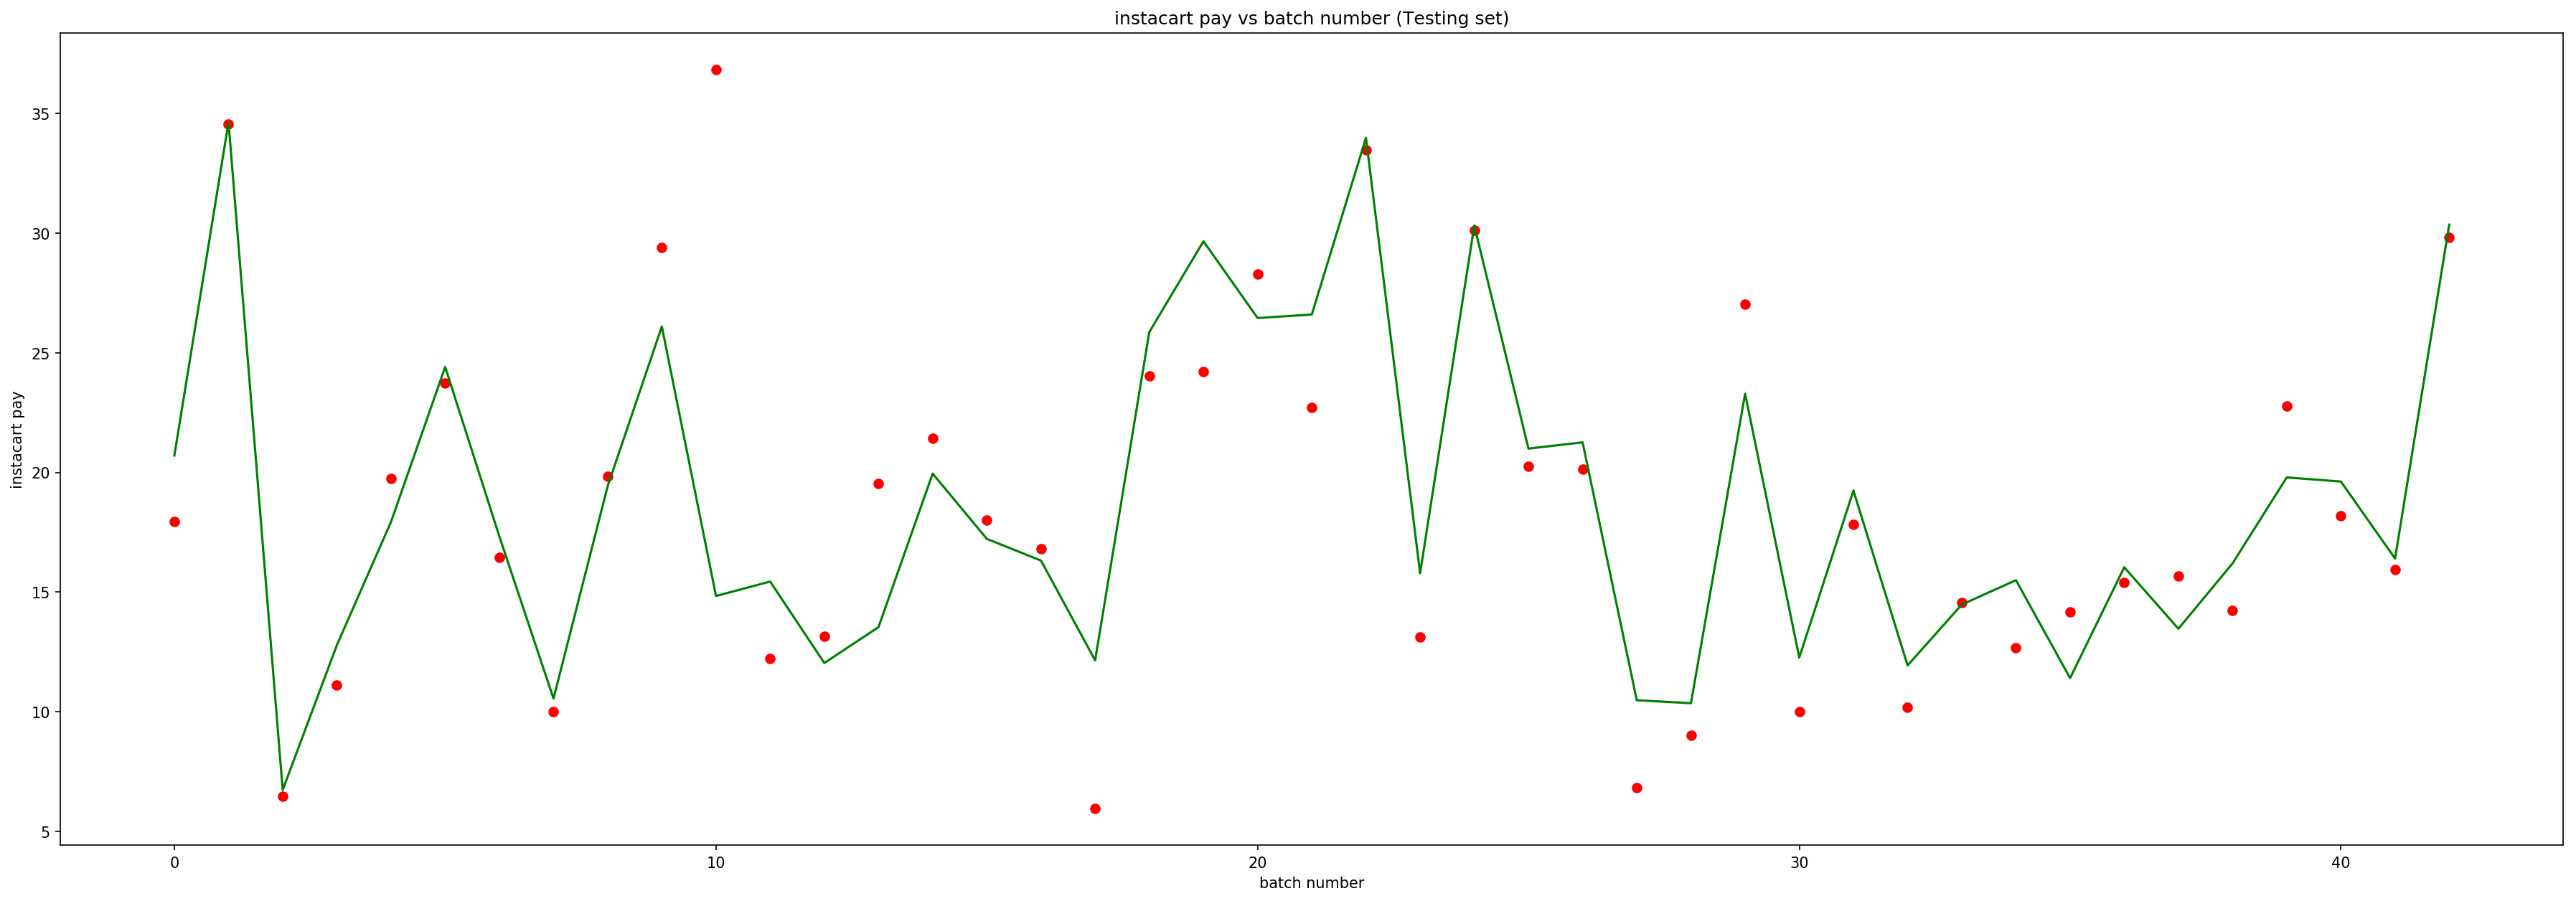

In [20]:
plt.figure(num=None, figsize=(30, 10), dpi=150, facecolor='w', edgecolor='k')

#all features INcluding store_name encoding

featureset2 = feature_columns
#print(featureset2)

lr = LinearRegression()
lr.fit(x_train[featureset2], y_train)
y_pred = lr.predict(x_test[featureset2])

#training set
'''plt.scatter(range(len(x_train)), y_train, color = "red")
plt.plot(range(len(x_train)), lr.predict(x_train[featureset2]), color = "green")
plt.title("instacart pay vs batch number (Training set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()'''

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#test set
plt.scatter(range(len(x_test)), y_test, color = "red")
plt.plot(range(len(x_test)), y_pred, color = "green")
plt.title("instacart pay vs batch number (Testing set)")
plt.xlabel("batch number")
plt.ylabel("instacart pay")
plt.show()

## correlation among variables
#shopping.corr()

Adding extra features of one-hot encoding of store_names makes the coefficient of determination even worse

## Per day income plot over time

102


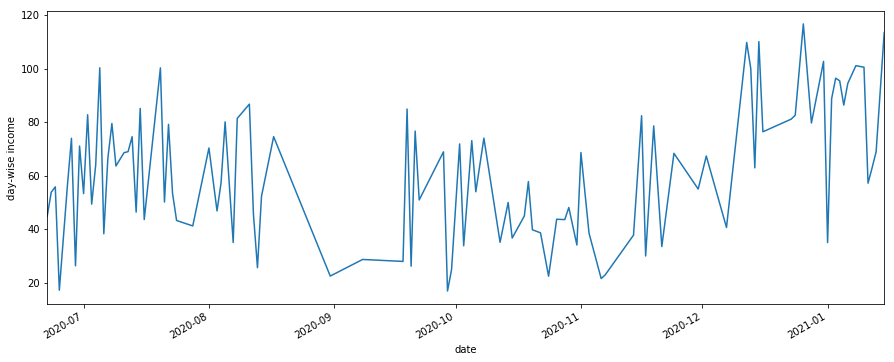

In [114]:
shopping['total_pay'] = shopping.apply(lambda row: row.instacart_pay_amount + row.tip_amount, axis=1)
perday_income = shopping.groupby(['date'])['total_pay'].sum() #total_pay is the column for sum of instacart pay and tip
print len(perday_income) #How many days I have worked
#type(perday_income) - series
plt.figure(figsize=[15,6])
plt.grid(True)
plt.gca().yaxis.grid(True)
perday_income.plot()
plt.ylabel('day-wise income')

perday_income = perday_income.to_frame()
perday_income['datetmp'] = perday_income.index

plt.show()
#print (perday_income)
#print(perday_income['total_pay'])

From the plot above, we can see that there are three days when income exceeded 100$. In the month of August, I didn't do instacart that much due to Amazon interview which is evident from the plot.

## time series analysis of hours taken to deliver a batch (batch accept time to last order delivery time)

3976.2295082 1941.73166245
3867.21854305 1521.94636578


,total_pay,total_time
total_pay,1.000000,0.848502
total_time,0.848502,1.000000


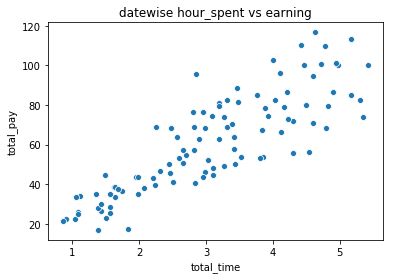

In [116]:
#df.apply(np.sum, axis=1)
from datetime import datetime
from datetime import timedelta
def timediff(t1, t2):
    FMT = '%H:%M %p'
    tdelta = datetime.strptime(t2, FMT) - datetime.strptime(t1, FMT)
    #print tdelta
    if tdelta.days < 0:
        tdelta = timedelta(days=0,seconds=tdelta.seconds, microseconds=tdelta.microseconds)
    #print tdelta, tdelta.seconds
    twelvehours = 12*60*60
    if tdelta.seconds > twelvehours:
        return tdelta.seconds -twelvehours
    return tdelta.seconds
    #return int (tdelta.strftime("%s"))
    
def batchtime_function(row):
    if row['num_orders'] == 1:
        return timediff(row['store_reach_time'], row['dropoff_time_A'])/row['num_orders']
    elif row['num_orders'] == 2:
        return timediff(row['store_reach_time'], row['dropoff_time_B'])/row['num_orders']
    else:
        return timediff(row['store_reach_time'], row['dropoff_time_C'])/row['num_orders']

def totaltime_function(row):
    if row['num_orders'] == 1:
        return timediff(row['store_reach_time'], row['dropoff_time_A'])*1.0/3600
    elif row['num_orders'] == 2:
        return timediff(row['store_reach_time'], row['dropoff_time_B'])*1.0/3600
    else:
        return timediff(row['store_reach_time'], row['dropoff_time_C'])*1.0/3600
        
    
shopping['batch_time'] = shopping.apply(batchtime_function, axis=1) #in seconds
shopping['total_time'] = shopping.apply(totaltime_function, axis=1) #in hours

def isMorning_batch(row):
    s = row['store_reach_time'].split(' ')
    if s[1] == 'AM':
        return True
    else:
        return False

#shopping['batch_time'].plot()



m = shopping.apply(isMorning_batch, axis=1)

morning_batch = shopping[m] #batches that started before 12pm

print np.mean(morning_batch['batch_time']), np.std(morning_batch['batch_time'])

evening_batch = shopping[~m] #batches that started after 12pm

print np.mean(evening_batch['batch_time']), np.std(evening_batch['batch_time'])
#print shopping['batch_time']

perday_hours_spent = shopping.groupby(['date'])['total_time'].sum()

perday_hours_spent = perday_hours_spent.to_frame() #converting to dataframe
perday_hours_spent['datetmp'] = perday_hours_spent.index

#print(perday_hours_spent['total_time'])


merged_daywisedata = pd.merge(left=perday_income, right=perday_hours_spent, left_on='datetmp', right_on='datetmp')

merged_daywisedata.head()

plt.title('datewise hour_spent vs earning')

sns.scatterplot(data=merged_daywisedata, x="total_time", y="total_pay")

#The plot shows a trend that more hours spent per day corresponds to more pay. But we also see data points that are aberrant
#This aberration could be due to various factors such as traffic jam,  long checkout queue, difficulty finding customer's home, heavy order, incliment weather etc

merged_daywisedata.corr(method ='pearson')


morning batches has higher variance of batch_time than evening batches although both type of batches have nearly same mean. It means that morning batches have got some batches with very shorter batch time

## Regarding total_time vs total_pay plot

pearson correlation coefficient between total_time and total_pay is 0.85, meaning large positive relationship. In general when hours_spent <= 1 hour, earning is around 20, when hours_spent >= 5 hours, earning is >=100


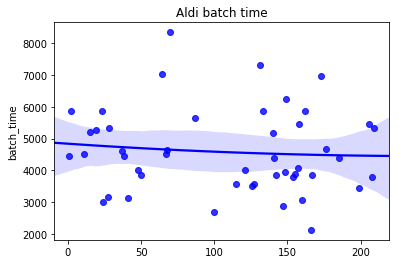

In [117]:
##trendline
import seaborn as sns

def plot_graph(store, order_type, shopping):
    #print shopping.head()
    #print shopping.loc[shopping['store_name'] == store]
    #
    shopping_1 = shopping.loc[(shopping['store_name'] == store) & (shopping['order_type'] == order_type)]
    #shopping_1.head()
    sns.regplot(x=shopping_1.index.values,y=shopping_1['batch_time'], order=2, color='b').set(title=store + ' batch time')
    #ax2 = plt.twinx()
    #sns.lineplot(data=df.column2, color="b", ax=ax2)
    #sns.regplot(x=shopping_1.index.values,y=shopping_1['batch_time'], order=2, color='g', ax=ax2)
    
plot_graph('Aldi', 'full service', shopping)
#plot_graph('BJ\'s Wholesale Club', 1, shopping) #1 param is for 'full service' order
#plot_graph('Aldi', 1, shopping)

Over the whole period of instacart shopping experience, batch time is having downward slope meaning taking less time to complete a batch

## Creating lag plots of batch time

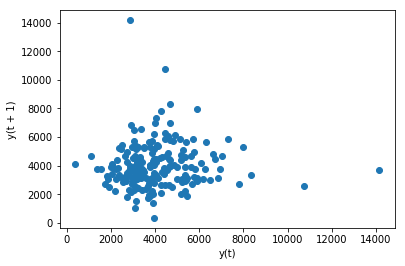

In [118]:
#shopping['lag'] = shopping['batch_time'].shift(1)
#sns.scatterplot(x=shopping['lag'],  y=shopping['batch_time'])

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

def lag_plot_func(order_type, shopping):
    shopping_1 = shopping.loc[(shopping['order_type'] == order_type)]
    lag_plot(shopping_1['batch_time'])
    
lag_plot_func('full service', shopping)

#s = shopping.loc[(shopping['order_type'] == 1)]
#sns.regplot(x=s['batch_time'][0:len(s['batch_time'])-1],y=s['batch_time'][1:len(s['batch_time'])], order=1, color='g').set(title='reg plot of lag')


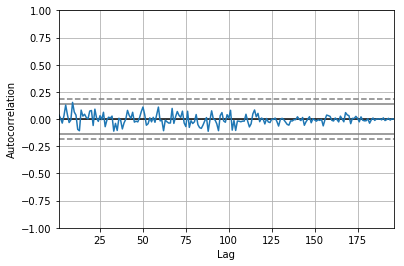

In [165]:
def autocorrelation_plot_func(order_type, shopping):
    shopping_1 = shopping.loc[(shopping['order_type'] == order_type)]
    autocorrelation_plot(shopping_1['batch_time'])
autocorrelation_plot_func('full service', shopping)

In [119]:
def store_wise_shopping_speed_analyze(store_name):
    shopping = pd.read_csv(datafile,  parse_dates=[0])
    store_shopping = shopping.loc[(shopping['store_name'] == store_name)]
    #print(len(store_shopping))
    store_shopping = store_shopping[store_shopping.shopping_speed.notnull()]
    store_shopping = store_shopping[store_shopping.shopping_speed != 'no data']
    store_shopping = store_shopping['shopping_speed'].to_frame()
    store_shopping['index'] = store_shopping.index
    #print(len(store_shopping))
    def convert_to_int(row):
        return int(row['shopping_speed'])
    store_shopping['shopping_speed'] = store_shopping.apply(convert_to_int, axis=1) #in seconds
    #print(store_shopping['shopping_speed'].mean())
    store_shopping.plot(kind='scatter',x='index',y='shopping_speed',color='red')
    plt.show()

    #costco_shopping['time']  = np.arange(len(costco_shopping))

    #linear regressor coefficient

    autocorrelation_plot(store_shopping['shopping_speed'])

## Auto correlation Shopping speed plot

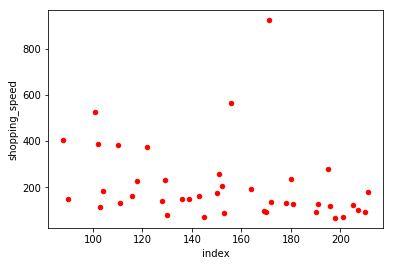

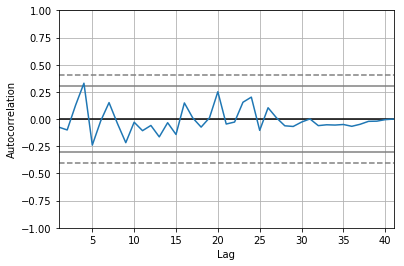

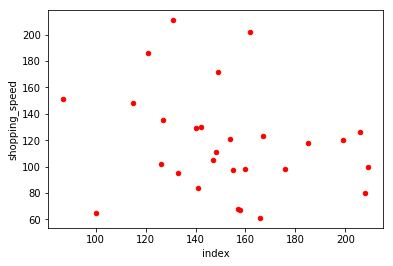

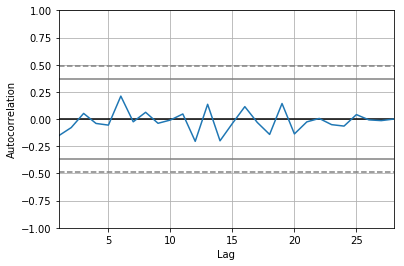

In [120]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

#correlogram plot
store_wise_shopping_speed_analyze('Costco')
store_wise_shopping_speed_analyze('Aldi')
#store_wise_shopping_speed_analyze("BJ's Wholesale Club")

#s = shopping.loc[(shopping['order_type'] == 1)]
#sns.regplot(x=s['batch_time'][0:len(s['batch_time'])-1],y=s['batch_time'][1:len(s['batch_time'])], order=1, color='g').set(title='reg plot of lag')


Shopping speed at Costco is highly positively correlated compared to shopping speed at Aldi

## Solving regression problem using ANN
### predict instacart_pay_amount using 28 features

In [121]:
shopping = pd.read_csv(datafile,  parse_dates=[0])

shopping = pd.get_dummies(shopping, columns=["store_name"], prefix=["store_"]) #encode store_name

shopping['num_items_tmp'] = shopping['num_items'].apply(item_function)
shopping['heavy_pay'] = shopping['heavy_pay'].apply(heavy_pay_func)
shopping['order_type_tmp'] = shopping['order_type'].apply(lambda x: 1 if 'full service' in x else 0)
shopping['num_units'] = shopping['num_items'].apply(item_function2)

feature_columns = ["order_type_tmp", "num_orders", 'drive_distance', 'num_items_tmp', 'heavy_pay', 'num_units']

for column in list(shopping.columns.values): 
    if column.find('store__') == 0: #all columns related to hot_encoding of unique store_names
        feature_columns.append(column)
        

x = shopping[feature_columns]
y = shopping[['instacart_pay_amount']]

X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
len(X_train_full)
len(X_train)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

#shopping['date'].dtype
#shopping['year'] = shopping['date'].dt.year
#https://www.kaggle.com/shadekur/timeseries-multivariate/edit
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

/home/shadek/anaconda2/envs/conceptvector/lib/python2.7/site-packages/ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/home/shadek/anaconda2/envs/conceptvector/lib/python2.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [122]:
X_train.shape

(119, 28)

In [123]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[28]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [124]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

In [126]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 119 samples, validate on 40 samples
Epoch 1/30
119/119 [==============================] - 0s 4ms/sample - loss: 558.6786 - mae: 21.4203 - val_loss: 443.1433 - val_mae: 19.5483
Epoch 2/30
119/119 [==============================] - 0s 193us/sample - loss: 503.7504 - mae: 20.1394 - val_loss: 381.1908 - val_mae: 17.9421
Epoch 3/30
119/119 [==============================] - 0s 367us/sample - loss: 426.6910 - mae: 18.2271 - val_loss: 289.9043 - val_mae: 15.2802
Epoch 4/30
119/119 [==============================] - 0s 372us/sample - loss: 310.9010 - mae: 15.0544 - val_loss: 172.1918 - val_mae: 11.2380
Epoch 5/30
119/119 [==============================] - 0s 288us/sample - loss: 174.1243 - mae: 10.7268 - val_loss: 75.4675 - val_mae: 7.2542
Epoch 6/30
119/119 [==============================] - 0s 325us/sample - loss: 78.4673 - mae: 6.7876 - val_loss: 42.8102 - val_mae: 4.8443
Epoch 7/30
119/119 [==============================] - 0s 265us/sample - loss: 43.2380 - mae: 4.9054 - val_loss:

In [127]:
mae_test = model.evaluate(X_test, y_test)

53/53 [==============================] - 0s 217us/sample - loss: 17.4212 - mae: 3.0389


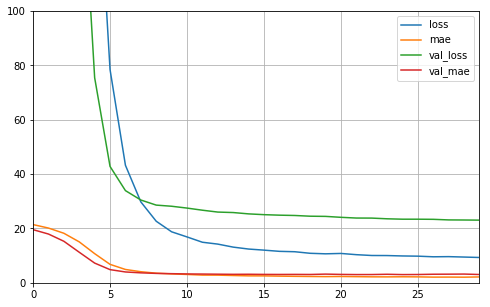

In [128]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 100)

plt.show()

## References:
    https://pbpython.com/categorical-encoding.html
    https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
    [auto-correlation] https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/
    https://www.displayr.com/autocorrelation/
    %%html
         
   <a href="https://www.udemy.com/course/machine-learning-time-series-forecasting-in-python/learn/lecture/18397990#announcements">Udemy course on time series</a>
    
    
    